## Milestone 4:

### Data Analysis and Visualisation.

A deeper explore of the data to drive insights to inform business decisions that may stimulate changes to be made to the website and marketing strategies. 

## Milestone 4, Task 1:
What are our customers doing?
Questions to explore:
1. Are sales proportionally happening more on weekends?
2. Which regions are generating the most revenue currently?
3. Is there any particular website traffic that stands out when generating sales?
4. What percentage of time is spent on the website performing administrative/product or informational related tasks?
5. Are there any informational/administrative tasks which users spend time doing most?
6. What is the breakdown of months making the most sales?

In [1]:
from plotter import Plotter
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import seaborn as sns

In [2]:
file_path = 'C:/Users/Chris/Documents/AiCoreEDA_Project/customer_activity_transformed.csv'
df = pd.read_csv(file_path)

#### 1. Are sales proportionally happening more on weekends?
Two of the seven days in a week comprise the weekend. Therefore the theoretical probability of a sale occuring on a weekend would be 28.6%.

To investigate whether sales were any more likely to happen on the weekend let's create a df where 'revenue' == True:

In [3]:
df_revenue_true = df[df['revenue'] == True]

Then, the probability of the weekend can be calculated using the probability distribution method in the Plotter class:

In [4]:
revenue_true_plots = Plotter(df_revenue_true)

Value counts:
weekend
False    1414
True      414
Name: count, dtype: int64

Probability:
weekend
False    0.773523
True     0.226477
Name: proportion, dtype: float64


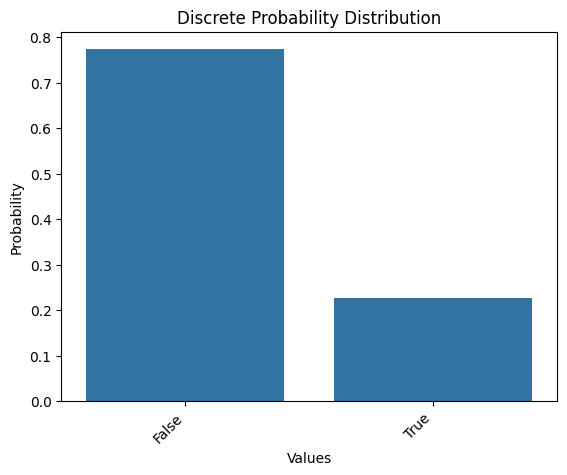

The mode of the distribution is False
The mean of the distribution is 0.22647702407002188
The median of the distribution is 0.0


In [5]:
revenue_true_plots.probability_distribution('weekend')

#### Results:

The data tell us that when a sale has occured the probability of that sale having occured on the weekend is 22.6%.
This is below the theoretical probability expected if there was an equal chance of a sale happening on any given day. Therefore, we know that sales are proportionally happening more during the week.

#### 2. Which regions are generating the most revenue currently?
Using the 'revenue' == True df, let's explore the regions which are generating the most revenue:

Value counts:
region
North America      719
Western Europe     310
Eastern Europe     187
Asia               177
South America      129
Africa             123
Northern Africa     88
Southern Africa     48
Oceania             47
Name: count, dtype: int64

Probability:
region
North America      0.393326
Western Europe     0.169584
Eastern Europe     0.102298
Asia               0.096827
South America      0.070569
Africa             0.067287
Northern Africa    0.048140
Southern Africa    0.026258
Oceania            0.025711
Name: proportion, dtype: float64


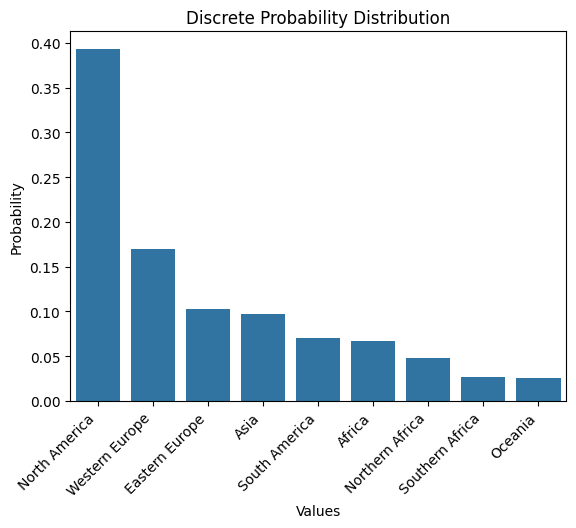

The mode of the distribution is North America
The mean cannot be calculated on this data series
The median cannot be calculated on this data series


In [6]:
revenue_true_plots.probability_distribution('region')

#### Results:
For the revenue generated across the year, the regions generating the most revenue were:
- North Americ (39.3 %)
- Western Europe (17.0 %)
- Eastern Europe (10.2 %)
- Asia (9.7 %)

#### 3. Is there any particular website traffic that stands out when generating sales?
Using the 'revenue' == True df, let's explore the website traffic which generated the most revenue:


Value counts:
traffic_type
Google search          836
Facebook ads           255
Bing search            167
Instagram ads          165
Youtube channel         85
Affiliate marketing     79
Twitter                 65
Youtube ads             49
Instagram Page          45
Tik Tok ads             36
Direct Traffic          23
Facebook page           11
Yahoo Search             4
Newsletter               3
Other                    2
Yandex search            1
Pinterest                1
Tik Tok page             1
Name: count, dtype: int64

Probability:
traffic_type
Google search          0.457330
Facebook ads           0.139497
Bing search            0.091357
Instagram ads          0.090263
Youtube channel        0.046499
Affiliate marketing    0.043217
Twitter                0.035558
Youtube ads            0.026805
Instagram Page         0.024617
Tik Tok ads            0.019694
Direct Traffic         0.012582
Facebook page          0.006018
Yahoo Search           0.002188
Newsletter        

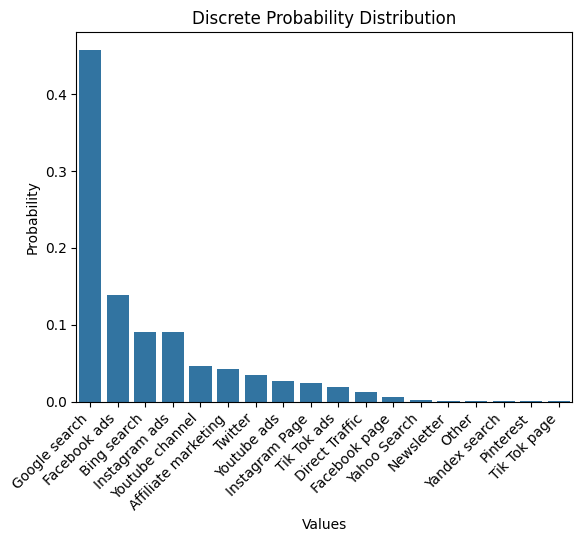

The mode of the distribution is Google search
The mean cannot be calculated on this data series
The median cannot be calculated on this data series


In [7]:
revenue_true_plots.probability_distribution('traffic_type')

#### Results:
The stand out performer is:
- Google search which resulted in 45.7 % of all sales.


#### 4. What percentage of time is spent on the website performing administrative/product or informational related tasks?


In [8]:
# Define a function that will calculate the time spent on each task as a percentage of total time spent across all tasks:

def time_spent(dataframe, *args):
    total_duration = 0
    for arg in args:
        sum_time = dataframe[arg].sum()
        total_duration = total_duration + sum_time
    for arg in args:
        print(f'The percentage of time spent on {arg.replace('_duration', '')} tasks is {(100 * dataframe[arg].sum() / total_duration).round(1)} %')

In [9]:
time_spent(df, 'administrative_duration', 'informational_duration', 'product_related_duration')

The percentage of time spent on administrative tasks is 24.0 %
The percentage of time spent on informational tasks is 9.6 %
The percentage of time spent on product_related tasks is 66.4 %


#### 5. Are there any informational/administrative tasks which users spend time doing most?
For this task I aim to list the tasks that the users were performing for the 5 longest periods of time

In [10]:
# Define a function to return the list:
 
def most_time(dataframe, sorting_column, task_column):
    sorted_data = dataframe.sort_values(by=sorting_column, ascending=False)
    return sorted_data[[task_column, sorting_column]].head()
    

In [11]:
# Use the function to produce the list for administrative tasks:

most_time(df, 'administrative_duration', 'administrative')

,administrative,administrative_duration
1672,0.693147,7.675546
2282,2.302585,7.667211
9201,2.708050,7.624245
11160,0.693147,7.576240
392,2.079442,7.576240


In [12]:
# Use the function to produce the list for informational tasks:

most_time(df, 'informational_duration', 'informational_plus_one')

,informational_plus_one,informational_duration
739,0.693147,7.595262
10180,1.098612,7.564238
1691,1.386294,7.547924
2954,1.791759,7.535350
1769,2.197225,7.517521


#### 6. What is the breakdown of months making the most sales?


Value counts:
month
Nov     709
May     328
Dec     264
Mar     169
Oct     128
Aug      70
Sep      69
Jul      67
June     19
Feb       5
Name: count, dtype: int64

Probability:
month
Nov     0.387856
May     0.179431
Dec     0.144420
Mar     0.092451
Oct     0.070022
Aug     0.038293
Sep     0.037746
Jul     0.036652
June    0.010394
Feb     0.002735
Name: proportion, dtype: float64


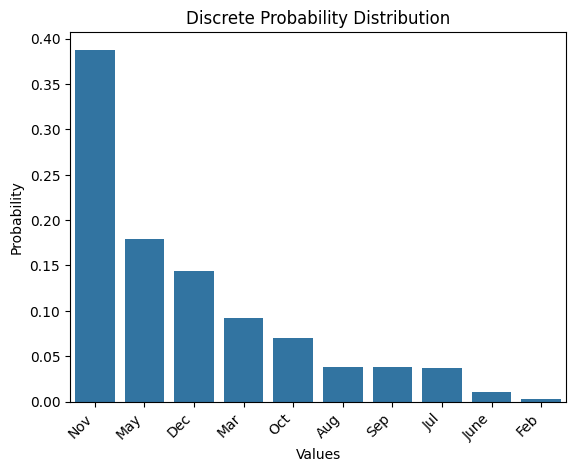

The mode of the distribution is Nov
The mean cannot be calculated on this data series
The median cannot be calculated on this data series


In [13]:
revenue_true_plots.probability_distribution('month')

#### Results:
For the revenue generated across the year, the months where the most sales were made were:
- Nov (38.8 %)
- May (18.0 %)
- Dec (14.4 %)

## Milestone 4, Task 2:
Determine what software our customers use to access the website.

#### Operating systems
##### 1. To investigate the count of operating systems our customers are using to visit the website and what percentage of total that equates to:

In [14]:
# Function to calculate value_counts and percentage_probability:

def customer_counts(dataframe, column_name):
    value_counts = dataframe[column_name].value_counts()
    percent_probs = (100 * dataframe[column_name].value_counts(normalize=True)).round(1)
    print('Value Counts:')
    print(value_counts)
    print()
    print('Percentage Probability:')
    print(percent_probs)
    dpd = sns.barplot(y = percent_probs.values, x = percent_probs.index)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Values')
    plt.ylabel('Percentage Probability')
    plt.title('Discrete Probability Distribution')
    plt.show()


Value Counts:
operating_systems
Windows    6285
MACOS      2554
Android    2466
iOS         367
Other        72
Name: count, dtype: int64

Percentage Probability:
operating_systems
Windows    53.5
MACOS      21.7
Android    21.0
iOS         3.1
Other       0.6
Name: proportion, dtype: float64


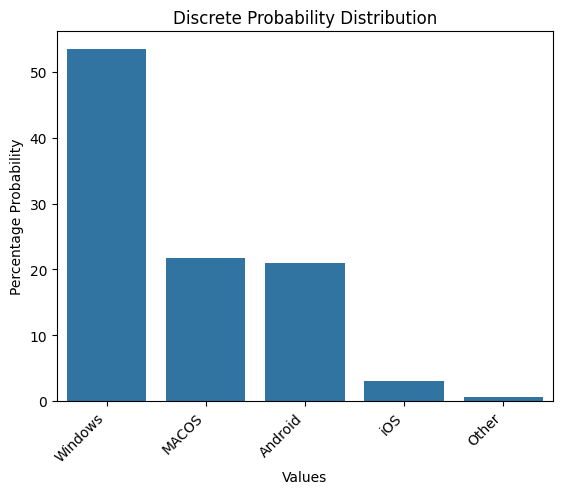

In [15]:
customer_counts(df, 'operating_systems')

The graph clearly indicates that the majority (53.5 %) of users use Windows operating system to access the website. MACOS and Android are close for second spot at around 21 % of users.

##### 2. To compare the amount of users visiting the site using a mobile operating system versus desktop:

The total number of users visiting the website using a: 
desktop operating system was: 8839 
mobile operating system was: 2905.

The percentage of users visiting the website using a: 
desktop operating system was: 75.3 % 
mobile operating system was: 24.7 %.


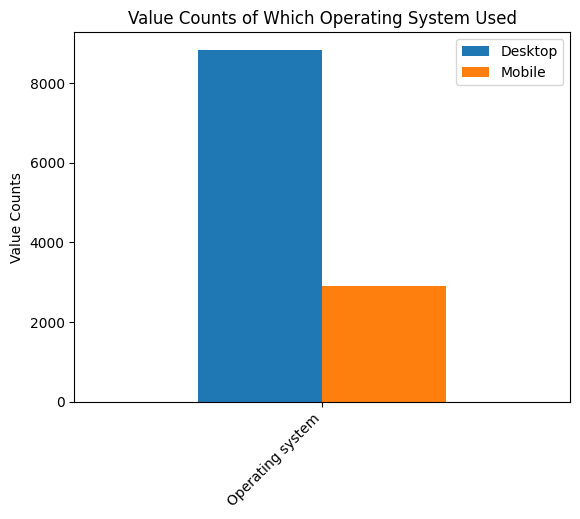

In [16]:
desktop = ['Windows', 'MACOS']
# In this dataset we have a category labeled "Other", which for the purposes of this analysis we will consider it to be mobile operating systems.
mobile = [category for category in df['operating_systems'].unique() if category not in desktop]

desktop_value_counts = 0
for category in desktop:
    desktop_value_counts = desktop_value_counts + (df['operating_systems'] == category).sum()

mobile_value_counts = 0
for category in mobile:
    mobile_value_counts = mobile_value_counts + (df['operating_systems'] == category).sum()

data = pd.DataFrame({
    'Desktop': desktop_value_counts,
    'Mobile': mobile_value_counts},
    index=['Operating system']
)

data.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value Counts')
plt.title('Value Counts of Which Operating System Used')

print(f'The total number of users visiting the website using a: \ndesktop operating system was: {desktop_value_counts} \nmobile operating system was: {mobile_value_counts}.')
print()
print(f'The percentage of users visiting the website using a: \ndesktop operating system was: {(100 * desktop_value_counts / (desktop_value_counts + mobile_value_counts)).round(1)} % \nmobile operating system was: {(100 * mobile_value_counts / (desktop_value_counts + mobile_value_counts)).round(1)} %.')


Over three quarters of our users access our website using a desktop operating system. While less than 25 % use a mobile operating system. The 24.7 % of users using a mobile operating system also includes the 0.6 % of users in the unknown "Other" category. 

##### 3. To investigate what the most commonly used browser was and their breakdown on mobile vs desktop:

Value Counts:
browser
Google Chrome        7363
Safari               2404
Mozilla Firefox       783
Microsoft Edge        558
Internet Explorer     148
Samsung Internet      140
Opera                 130
Android               112
Other                 106
Name: count, dtype: int64

Percentage Probability:
browser
Google Chrome        62.7
Safari               20.5
Mozilla Firefox       6.7
Microsoft Edge        4.8
Internet Explorer     1.3
Samsung Internet      1.2
Opera                 1.1
Android               1.0
Other                 0.9
Name: proportion, dtype: float64


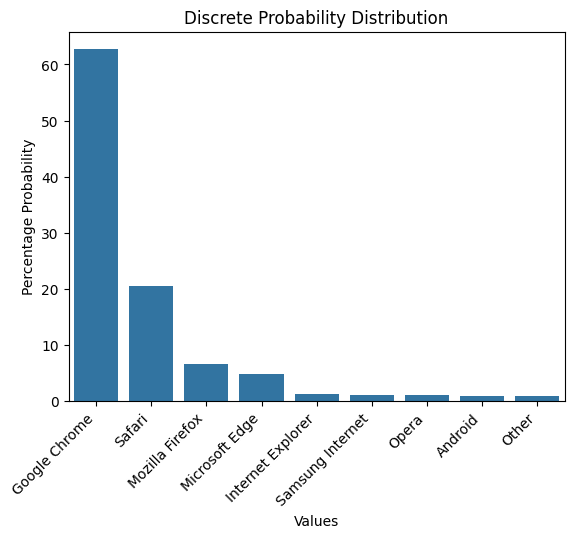

In [17]:
# To determine the value counts and percentage probability for browser the customer_counts function created earlier can be used:

customer_counts(df, 'browser')

Google Chrome (62.7 %) and Safari (20.5 %) were the two most commonly used browsers to access our website. 

To further analyse the data, including the breakdown of mobile vs desktop analysis it will be necessary to manipulate the dataframe:

In [25]:
# Create a copy of the df:
df_analysis = df.copy()
# Replace operating_system categories with Desktop and Mobile:
df_analysis['operating_systems'] = df_analysis['operating_systems'].replace(desktop, 'Desktop')
df_analysis['operating_systems'] = df_analysis['operating_systems'].replace(mobile, 'Mobile')
df_analysis['operating_systems'].value_counts()

operating_systems
Desktop    8839
Mobile     2905
Name: count, dtype: int64

Seaborns countplot can be used to visualise the breakdown of browsers used for mobile vs desktop:

Text(0.5, 1.0, 'Value Counts of Browser Used')

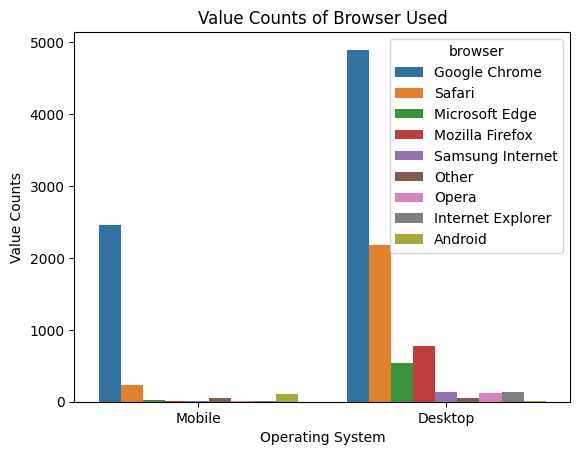

In [26]:
sns.countplot(x=df_analysis['operating_systems'], hue=df_analysis['browser'])
plt.xlabel('Operating System')
plt.ylabel('Value Counts')
plt.title('Value Counts of Browser Used')

In [27]:
# Pandas groupby() and siz() functions can be used to get value counts on the beakdown:

df_analysis.groupby(['operating_systems', 'browser']).size().reset_index(name='value_counts')

,operating_systems,browser,value_counts
0,Desktop,Android,4
1,Desktop,Google Chrome,4898
2,Desktop,Internet Explorer,135
3,Desktop,Microsoft Edge,540
4,Desktop,Mozilla Firefox,770
5,Desktop,Opera,124
6,Desktop,Other,58
7,Desktop,Safari,2176
8,Desktop,Samsung Internet,134
9,Mobile,Android,108


##### 3. Are there any region specific variations on what the most popular operating system is?

In [46]:
# The data can be grouped by 'region' and 'operating_system' before siz() function is used to generated value counts:

df.groupby(['region', 'operating_systems']).size().reset_index(name='value_counts')

,region,operating_systems,value_counts
0,Africa,Android,128
1,Africa,MACOS,97
2,Africa,Other,2
3,Africa,Windows,484
4,Africa,iOS,22
5,Asia,Android,239
6,Asia,MACOS,246
7,Asia,Other,4
8,Asia,Windows,559
9,Asia,iOS,33


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'North America'),
  Text(1, 0, 'Western Europe'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Northern Africa'),
  Text(5, 0, 'Southern Africa'),
  Text(6, 0, 'Africa'),
  Text(7, 0, 'Eastern Europe'),
  Text(8, 0, 'Oceania')])

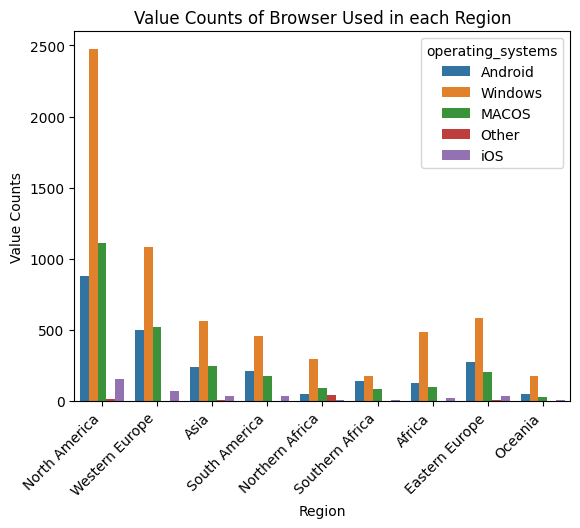

In [47]:
# Plotting this data:

sns.countplot(x=df['region'], hue=df['operating_systems'])
plt.xlabel('Region')
plt.ylabel('Value Counts')
plt.title('Value Counts of Browser Used in each Region')
plt.xticks(rotation=45, ha='right')

It is useful to visualise the value counts of each operating system being used in each region. This provides a good visual representation of where the majority of web traffic is coming from. 
However, to compare differences accross regions the data needs to be normalised to each region:

Text(0.5, 28.999999999999986, 'Region')

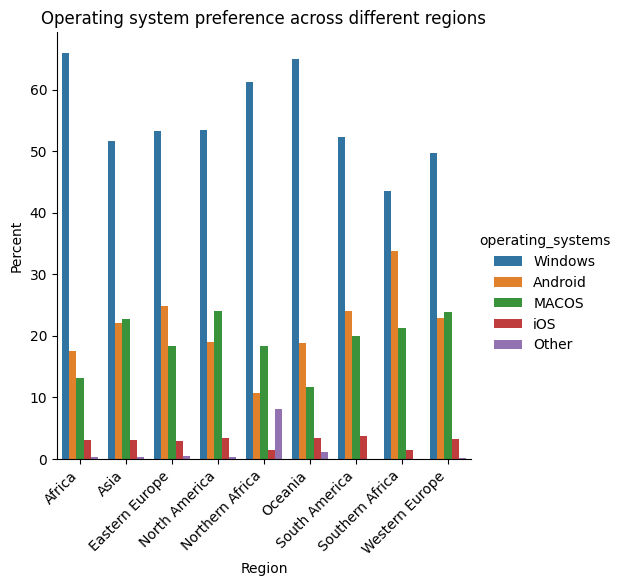

In [52]:
x = 'region'
y = 'operating_systems'


(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'))
plt.title('Operating system preference across different regions')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Region')

#### Results:
- Windows is the most popular operating system in every region.
- Android is the second most popular operating system in: Africa, Eastern Europe, Oceania, South America and Southern Africa.
- MACOS is the second most popular operating system in: Asia, North America, Northern Africa, and Western Europe.
- Northern Africa has a significantly higher proporation of users in the 'Other' category and a much lower number of users using Android. It would be a good idea to look into this in more detail.